In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Importando a base
os.chdir('C:/Users/ericp/Documents/PIMES/Machine Learning/Projeto final/dados')
base = pd.read_excel('BASE RM COUNT DIA1.xlsx')

In [7]:
# Criando variáveis para meses e anos
base['MES'] = pd.DatetimeIndex(base['DATA']).month
base['ANO'] = pd.DatetimeIndex(base['DATA']).year
xs = ['1','2','3','4','5','6','7','8','9','10','11','12']
nms = ['JAN', 'FEV','MAR', 'ABR', 'MAI', 'JUN', 'JUL', 'AGO', 'SET', 'OUT', 'NOV', 'DEZ']
nomes_meses = pd.Series(xs, index=nms).reset_index()
nomes_meses.columns = ['MES1', 'MES']
base.set_index(['MES'], inplace=True)

In [8]:
# Agregando por mês
basemes = base.groupby(['MES']).agg({'INCENDIO':'sum','PRECIPITACAO':'sum', 'PRESSAO_AT': 'mean','TEMPERATURA_AR':'mean',
                                     'TEMPERATURA_PONTO_ORVALHO':'mean', 'UMIDADE_RELATIVA':'mean', 'VEL_VENTO':'mean'}).reset_index()

In [9]:
# Como a quantidade de meses únicos é diferente, é necessário calcular médias para 
# meses que aparecem duas ou três vezes na base de dados.
# Definindo funções para calcular médias mensais.
def mes(arg):
    if arg == 49:
        return arg/2
    if arg != 49:
        return arg/3
    
basemes['INCENDIO'] = basemes['INCENDIO'].map(mes)

def mes1(arg1):
    if arg1 == 152.6:
        return arg1/2
    if arg1 != 152.6:
        return arg1/3


basemes['PRECIPITACAO'] = basemes['PRECIPITACAO'].map(mes1)

basemes = pd.concat([basemes, nomes_meses], axis=1)
basemes['MES1'].astype(str)

0     JAN
1     FEV
2     MAR
3     ABR
4     MAI
5     JUN
6     JUL
7     AGO
8     SET
9     OUT
10    NOV
11    DEZ
Name: MES1, dtype: object

Text(0.0, 1.0, 'Painel 1f: Velocidade do Vento (m/s)')

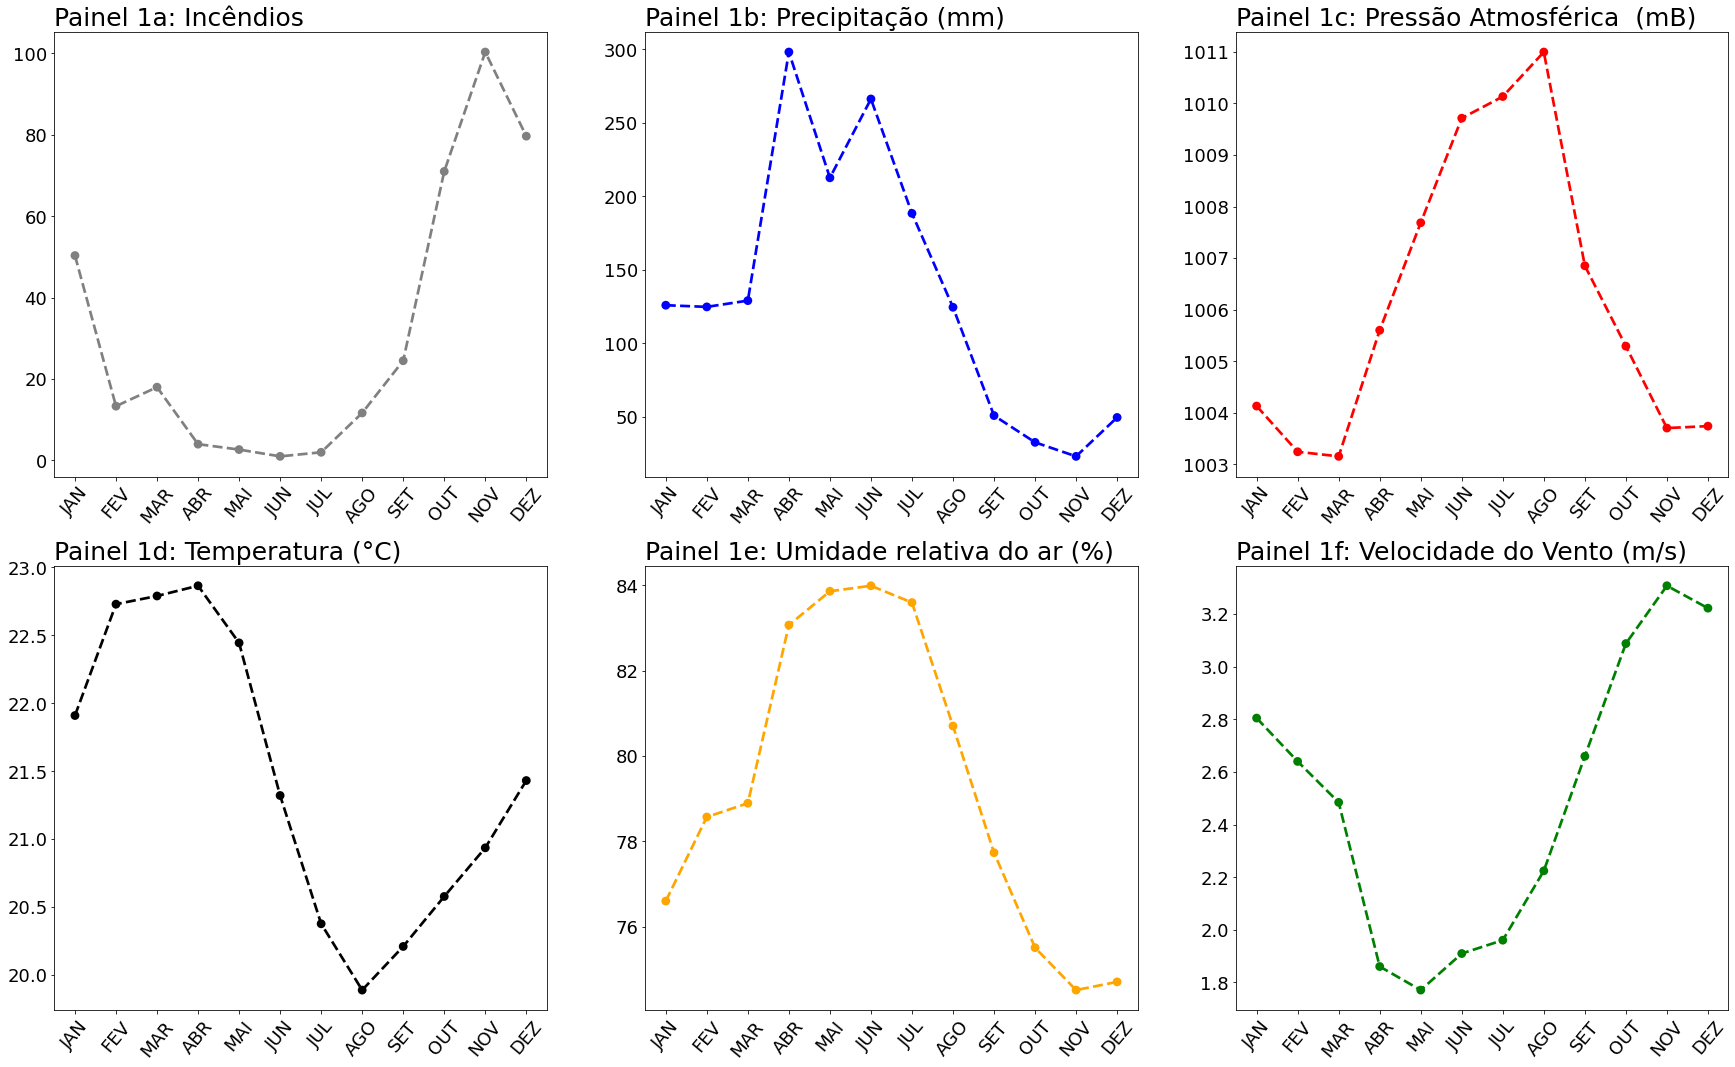

In [15]:
## Gráficos de médias para cada mês
plt.figure(figsize=(30,18))
plt.subplot(231)
sns.pointplot(basemes["MES1"],basemes['INCENDIO'],color='gray', linestyles='--')
plt.ylabel("")
plt.yticks( fontsize=18)
plt.xticks(rotation = 50, fontsize=18)
plt.xlabel("")
plt.title("Painel 1a: Incêndios",loc='left',fontsize=25)

plt.subplot(232)
sns.pointplot(basemes["MES1"],basemes["PRECIPITACAO"],color='blue', linestyles='--')
plt.yticks( fontsize=18)
plt.xticks(rotation = 50, fontsize=18)
plt.ylabel("")
plt.xlabel("")
plt.title("Painel 1b: Precipitação (mm)",loc='left',fontsize=25)

plt.subplot(233)
sns.pointplot(basemes["MES1"],basemes["PRESSAO_AT"],color='red', linestyles='--')
plt.yticks( fontsize=18)
plt.xticks(rotation = 50, fontsize=18)
plt.ylabel("")
plt.xlabel("")
plt.title("Painel 1c: Pressão Atmosférica  (mB)",loc='left',fontsize=25)

plt.subplot(234)
sns.pointplot(basemes["MES1"],basemes["TEMPERATURA_PONTO_ORVALHO" ],color='k', linestyles='--')
plt.yticks( fontsize=18)
plt.xticks(rotation = 50, fontsize=18)
plt.ylabel("")
plt.xlabel('')
plt.title("Painel 1d: Temperatura (°C)",loc='left',fontsize=25)

plt.subplot(235)
sns.pointplot(basemes["MES1"],basemes["UMIDADE_RELATIVA"],color='orange', linestyles='--')
plt.yticks( fontsize=18)
plt.xticks(rotation = 50, fontsize=18)
plt.ylabel("")
plt.xlabel('')
plt.title("Painel 1e: Umidade relativa do ar (%)",loc='left',fontsize=25)
plt.subplot(236)
sns.pointplot(basemes["MES1"],basemes["VEL_VENTO"],color='green', linestyles='--')
plt.yticks( fontsize=18)
plt.xticks(rotation = 50, fontsize=18)
plt.ylabel("")
plt.xlabel('')
plt.title("Painel 1f: Velocidade do Vento (m/s)",loc='left',fontsize=25)